# Mohr Coulomb Verification

In [1]:
# Import Matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Data
plaxis_psi0 = np.genfromtxt("PLAXIS_psi0.csv", delimiter=",")
plaxis_psi_neg5 = np.genfromtxt("PLAXIS_psi-5.csv", delimiter=",")
plaxis_psi_pos5 = np.genfromtxt("PLAXIS_psi+5.csv", delimiter=",")


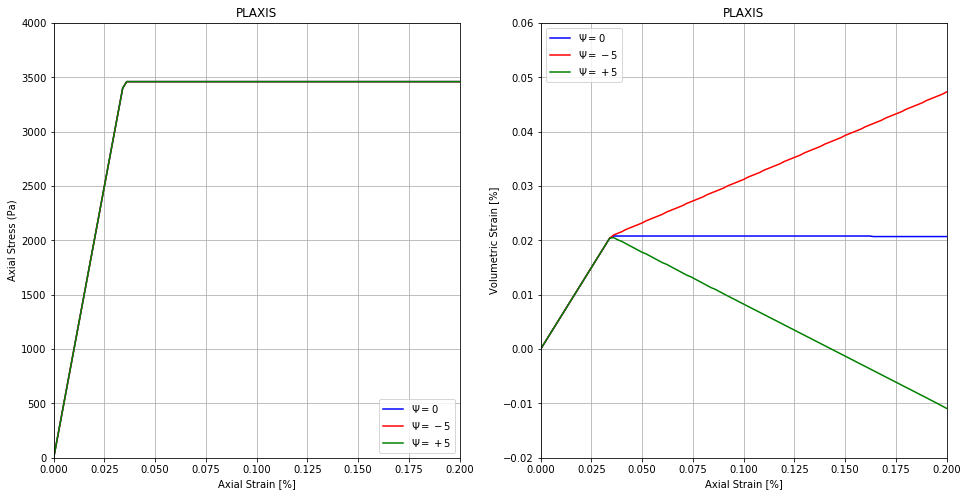

In [3]:
# Plot PLAXIS Results
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'b', label='$\Psi = 0$')
plt.plot(plaxis_psi_neg5[:,0] * -100, plaxis_psi_neg5[:,1] * 1000, 'r', label='$\Psi = -5$')
plt.plot(plaxis_psi_pos5[:,0] * -100, plaxis_psi_pos5[:,1] * 1000, 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, 0, 4000])
plt.legend(loc='lower right')
plt.title('PLAXIS')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(122)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'b', label='$\Psi = 0$')
plt.plot(plaxis_psi_neg5[:,0] * -100, plaxis_psi_neg5[:,2] * -100, 'r', label='$\Psi = -5$')
plt.plot(plaxis_psi_pos5[:,0] * -100, plaxis_psi_pos5[:,2] * -100, 'g', label='$\Psi = +5$')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('PLAXIS')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    
    
plt.show()

## Plotting all 4 points in Element

- Point 0: botom left
- Point 1: bottom right
- Point 2: upper left
- Point 3: upper right

# Linear Elastic with Shyamini's Codes

Note the following:
1. Shyamini did not implement Mohr Coulomb, or at least not in the version I have
1. She is using BBar
1. There is a difference between the USF and the MUSL we are using

In [5]:
# Getting more data

stress_nodamping_ile_0 = np.genfromtxt("test_s/stress_0.txt")
stress_nodamping_ile_1 = np.genfromtxt("test_s/stress_1.txt")
stress_nodamping_ile_2 = np.genfromtxt("test_s/stress_2.txt")
stress_nodamping_ile_3 = np.genfromtxt("test_s/stress_3.txt")

strain_nodamping_ile_0 = np.genfromtxt("test_s/strain_0.txt")
strain_nodamping_ile_1 = np.genfromtxt("test_s/strain_1.txt")
strain_nodamping_ile_2 = np.genfromtxt("test_s/strain_2.txt")
strain_nodamping_ile_3 = np.genfromtxt("test_s/strain_3.txt")

#acceleration_nodamping_ile_0 = np.genfromtxt("test_ile/acceleration_0.txt")
#acceleration_nodamping_ile_1 = np.genfromtxt("test_ile/acceleration_1.txt")
#acceleration_nodamping_ile_2 = np.genfromtxt("test_ile/acceleration_2.txt")
#acceleration_nodamping_ile_3 = np.genfromtxt("test_ile/acceleration_3.txt")

velocity_nodamping_ile_0 = np.genfromtxt("test_s/velocity_0.txt")
velocity_nodamping_ile_1 = np.genfromtxt("test_s/velocity_1.txt")
velocity_nodamping_ile_2 = np.genfromtxt("test_s/velocity_2.txt")
velocity_nodamping_ile_3 = np.genfromtxt("test_s/velocity_3.txt")

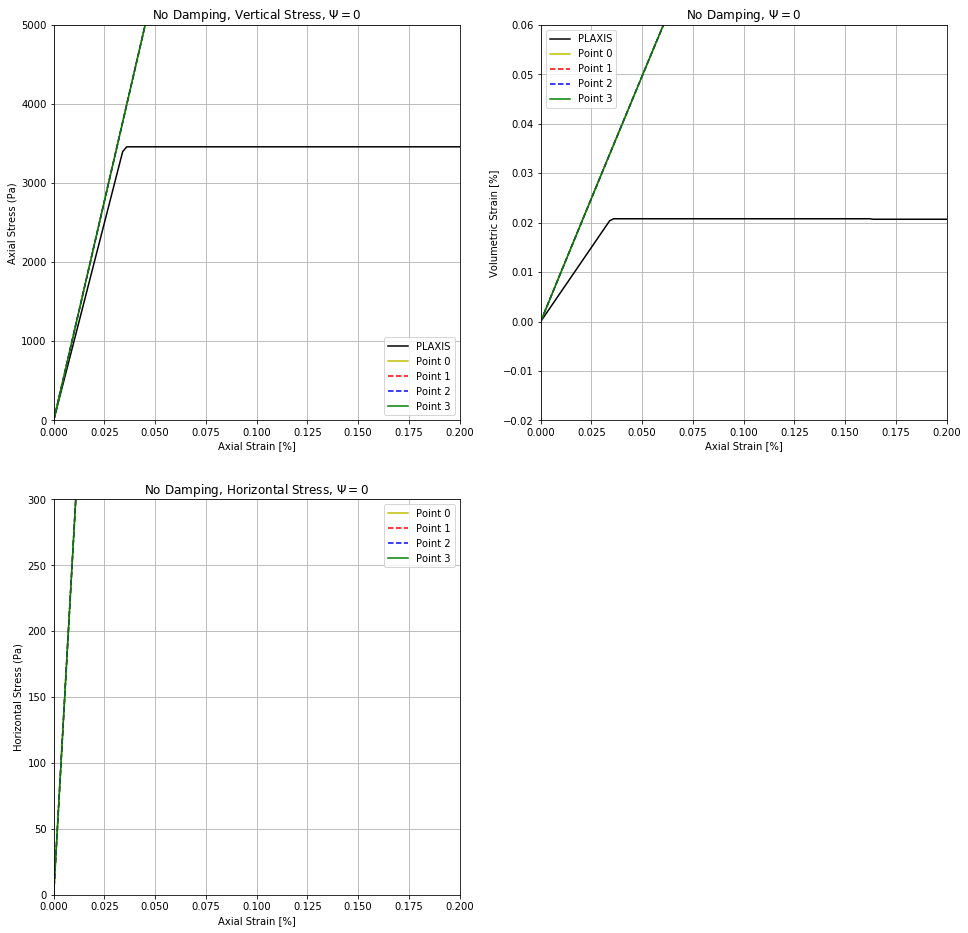

In [6]:
# Plot Comparison for Psi = 0, No Damping
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(strain_nodamping_ile_0[:,2] * -100 , stress_nodamping_ile_0[:,2] * -1, 'y', label='Point 0')
plt.plot(strain_nodamping_ile_1[:,2] * -100 , stress_nodamping_ile_1[:,2] * -1, 'r--', label='Point 1')
plt.plot(strain_nodamping_ile_2[:,2] * -100 , stress_nodamping_ile_2[:,2] * -1, 'b--', label='Point 2')
plt.plot(strain_nodamping_ile_3[:,2] * -100 , stress_nodamping_ile_3[:,2] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 5000])
plt.legend(loc='lower right')
plt.title('No Damping, Vertical Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(222)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'k', label='PLAXIS')
plt.plot(strain_nodamping_ile_0[:,2] * -100 , (strain_nodamping_ile_0[:,2] + strain_nodamping_ile_0[:,1]) * -100, 'y', label='Point 0')
plt.plot(strain_nodamping_ile_1[:,2] * -100 , (strain_nodamping_ile_1[:,2] + strain_nodamping_ile_1[:,1]) * -100, 'r--', label='Point 1')
plt.plot(strain_nodamping_ile_2[:,2] * -100 , (strain_nodamping_ile_2[:,2] + strain_nodamping_ile_2[:,1]) * -100, 'b--', label='Point 2')
plt.plot(strain_nodamping_ile_3[:,2] * -100 , (strain_nodamping_ile_3[:,2] + strain_nodamping_ile_3[:,1]) * -100, 'g', label='Point 3')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('No Damping, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    

plt.subplot(223)
plt.plot(strain_nodamping_ile_0[:,2] * -100 , stress_nodamping_ile_0[:,1] * -1, 'y', label='Point 0')
plt.plot(strain_nodamping_ile_1[:,2] * -100 , stress_nodamping_ile_1[:,1] * -1, 'r--', label='Point 1')
plt.plot(strain_nodamping_ile_2[:,2] * -100 , stress_nodamping_ile_2[:,1] * -1, 'b--', label='Point 2')
plt.plot(strain_nodamping_ile_3[:,2] * -100 , stress_nodamping_ile_3[:,1] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 300])
plt.legend(loc='upper right')
plt.title('No Damping, Horizontal Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Horizontal Stress (Pa)')
plt.grid(True)

plt.show()

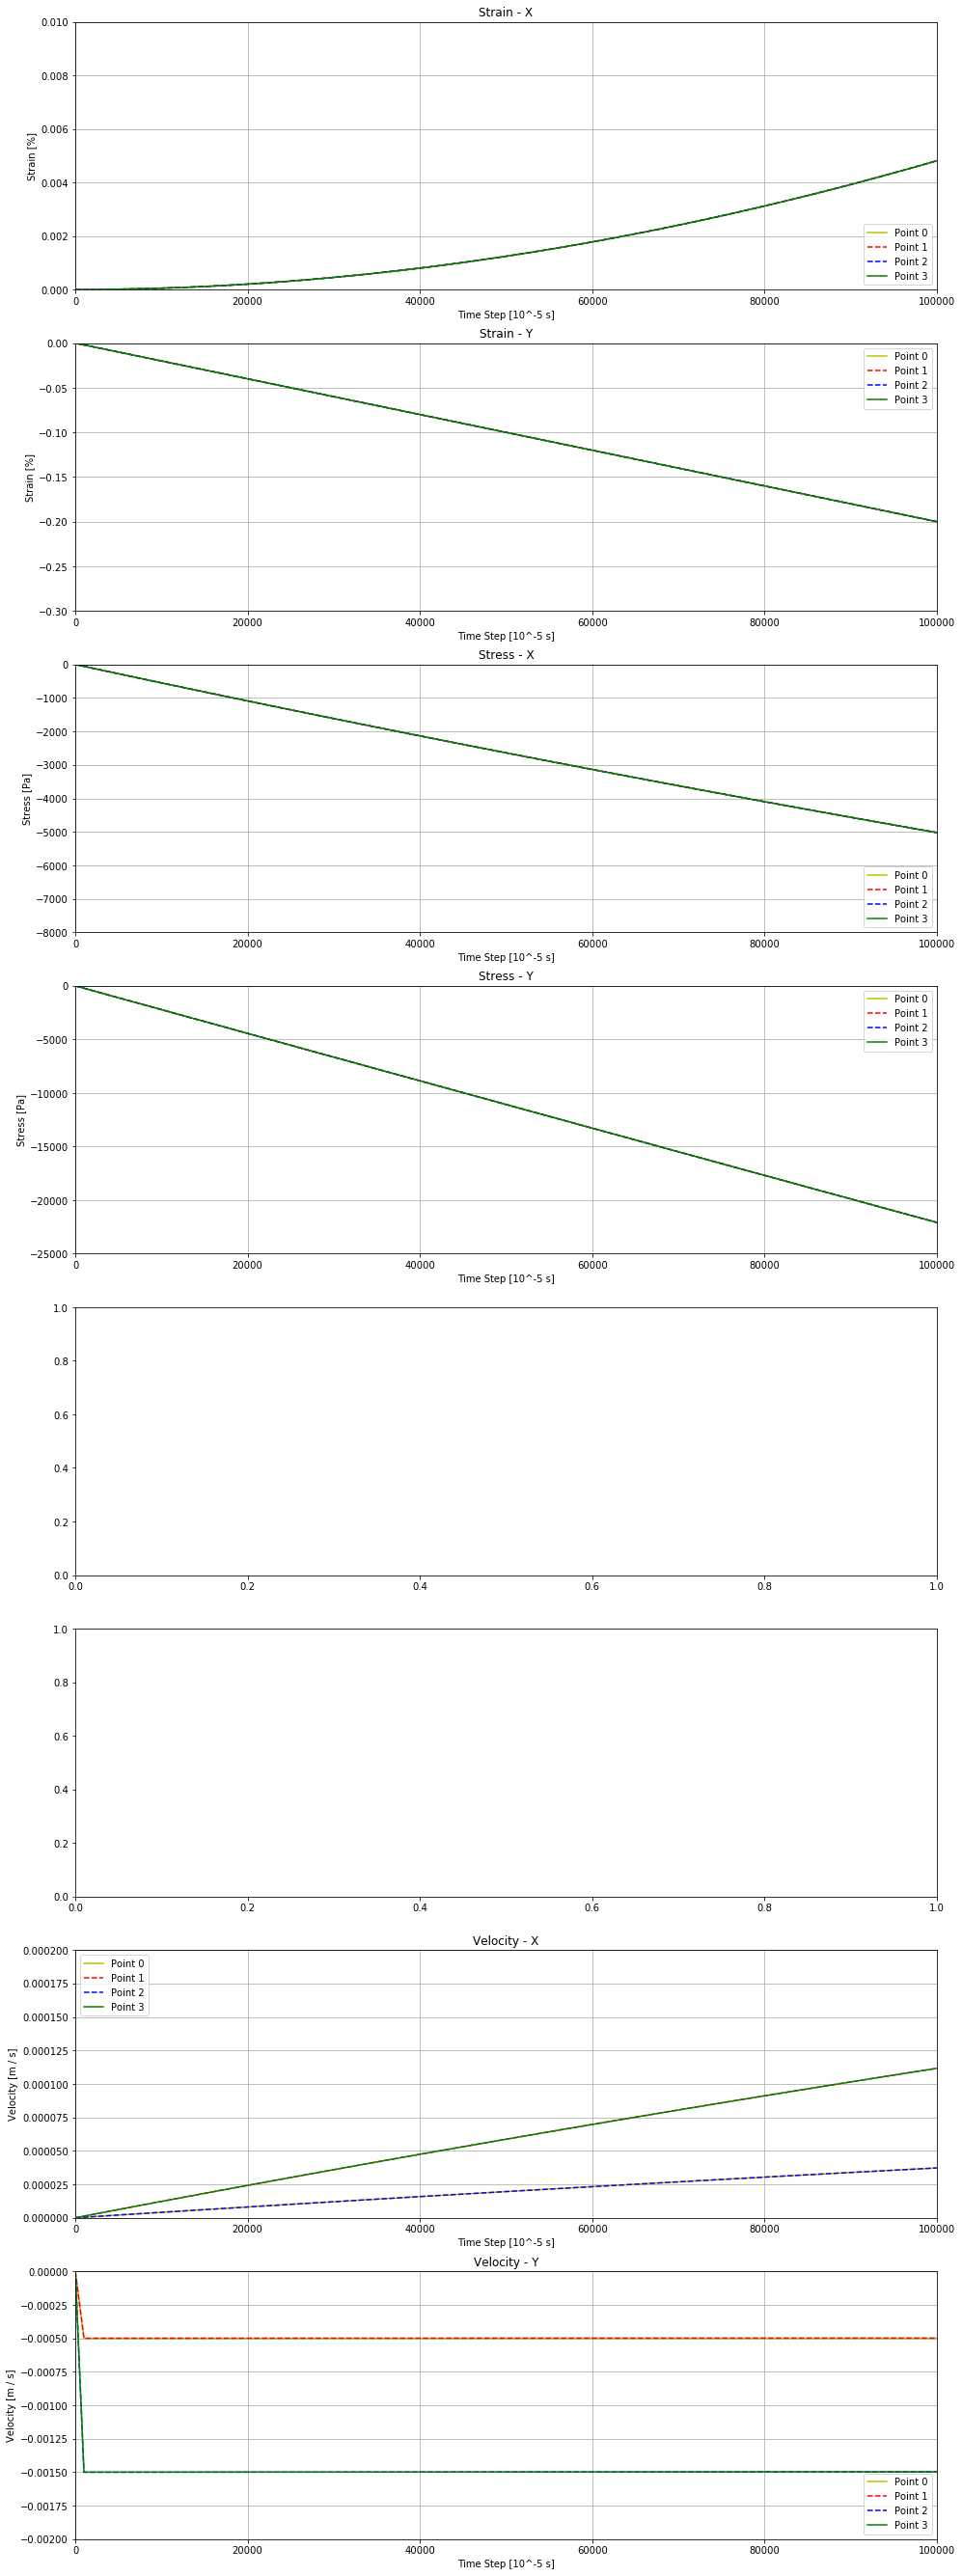

In [7]:
# Plot Comparison

plt.figure(figsize=(16,48))

plt.subplot(811)
plt.plot(strain_nodamping_ile_0[:,0], strain_nodamping_ile_0[:,1] * 100, 'y', label='Point 0')
plt.plot(strain_nodamping_ile_1[:,0], strain_nodamping_ile_1[:,1] * 100, 'r--', label='Point 1')
plt.plot(strain_nodamping_ile_2[:,0], strain_nodamping_ile_2[:,1] * 100, 'b--', label='Point 2')
plt.plot(strain_nodamping_ile_3[:,0], strain_nodamping_ile_3[:,1] * 100, 'g', label='Point 3')
plt.axis([0, 100000, 0, 0.01])
plt.legend(loc='lower right')
plt.title('Strain - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Strain [%]')
plt.grid(True)

plt.subplot(812)
plt.plot(strain_nodamping_ile_0[:,0], strain_nodamping_ile_0[:,2] * 100, 'y', label='Point 0')
plt.plot(strain_nodamping_ile_1[:,0], strain_nodamping_ile_1[:,2] * 100, 'r--', label='Point 1')
plt.plot(strain_nodamping_ile_2[:,0], strain_nodamping_ile_2[:,2] * 100, 'b--', label='Point 2')
plt.plot(strain_nodamping_ile_3[:,0], strain_nodamping_ile_3[:,2] * 100, 'g', label='Point 3')
plt.axis([0, 100000, -0.3, 0 ])
plt.legend(loc='upper right')
plt.title('Strain - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Strain [%]')
plt.grid(True)

plt.subplot(813)
plt.plot(stress_nodamping_ile_0[:,0], stress_nodamping_ile_0[:,1], 'y', label='Point 0')
plt.plot(stress_nodamping_ile_1[:,0], stress_nodamping_ile_1[:,1], 'r--', label='Point 1')
plt.plot(stress_nodamping_ile_2[:,0], stress_nodamping_ile_2[:,1], 'b--', label='Point 2')
plt.plot(stress_nodamping_ile_3[:,0], stress_nodamping_ile_3[:,1], 'g', label='Point 3')
plt.axis([0, 100000, -8000, 0])
plt.legend(loc='lower right')
plt.title('Stress - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Stress [Pa]')
plt.grid(True)

plt.subplot(814)
plt.plot(stress_nodamping_ile_0[:,0], stress_nodamping_ile_0[:,2], 'y', label='Point 0')
plt.plot(stress_nodamping_ile_1[:,0], stress_nodamping_ile_1[:,2], 'r--', label='Point 1')
plt.plot(stress_nodamping_ile_2[:,0], stress_nodamping_ile_2[:,2], 'b--', label='Point 2')
plt.plot(stress_nodamping_ile_3[:,0], stress_nodamping_ile_3[:,2], 'g', label='Point 3')
plt.axis([0, 100000, -25000, 0])
plt.legend(loc='upper right')
plt.title('Stress - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Stress [Pa]')
plt.grid(True)

plt.subplot(815)
#plt.plot(acceleration_nodamping_ile_0[:,0], acceleration_nodamping_ile_0[:,1], 'y', label='Point 0')
#plt.plot(acceleration_nodamping_ile_1[:,0], acceleration_nodamping_ile_1[:,1], 'r--', label='Point 1')
#plt.plot(acceleration_nodamping_ile_2[:,0], acceleration_nodamping_ile_2[:,1], 'b--', label='Point 2')
#plt.plot(acceleration_nodamping_ile_3[:,0], acceleration_nodamping_ile_3[:,1], 'g', label='Point 3')
#plt.axis([0, 100000, 0, 10])
#plt.legend(loc='upper right')
#plt.title('Acceleration - X')
#plt.xlabel('Time Step [10^-5 s]')
#plt.ylabel('Acceleration [m / s^2]')
#plt.grid(True)

plt.subplot(816)
#plt.plot(acceleration_nodamping_ile_0[:,0], acceleration_nodamping_ile_0[:,2], 'y', label='Point 0')
#plt.plot(acceleration_nodamping_ile_1[:,0], acceleration_nodamping_ile_1[:,2], 'r--', label='Point 1')
#plt.plot(acceleration_nodamping_ile_2[:,0], acceleration_nodamping_ile_2[:,2], 'b--', label='Point 2')
#plt.plot(acceleration_nodamping_ile_3[:,0], acceleration_nodamping_ile_3[:,2], 'g', label='Point 3')
#plt.axis([0, 100000, -0.001, 0.001])
#plt.legend(loc='lower right')
#plt.title('Acceleration - Y')
#plt.xlabel('Time Step [10^-5 s]')
#plt.ylabel('Acceleration [m / s^2]')
#plt.grid(True)

plt.subplot(817)
plt.plot(velocity_nodamping_ile_0[:,0], velocity_nodamping_ile_0[:,1], 'y', label='Point 0')
plt.plot(velocity_nodamping_ile_1[:,0], velocity_nodamping_ile_1[:,1], 'r--', label='Point 1')
plt.plot(velocity_nodamping_ile_2[:,0], velocity_nodamping_ile_2[:,1], 'b--', label='Point 2')
plt.plot(velocity_nodamping_ile_3[:,0], velocity_nodamping_ile_3[:,1], 'g', label='Point 3')
plt.axis([0, 100000, 0, 0.0002])
plt.legend(loc='upper left')
plt.title('Velocity - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Velocity [m / s]')
plt.grid(True)

plt.subplot(818)
plt.plot(velocity_nodamping_ile_0[:,0], velocity_nodamping_ile_0[:,2], 'y', label='Point 0')
plt.plot(velocity_nodamping_ile_1[:,0], velocity_nodamping_ile_1[:,2], 'r--', label='Point 1')
plt.plot(velocity_nodamping_ile_2[:,0], velocity_nodamping_ile_2[:,2], 'b--', label='Point 2')
plt.plot(velocity_nodamping_ile_3[:,0], velocity_nodamping_ile_3[:,2], 'g', label='Point 3')
plt.axis([0, 100000, -0.002, 0])
plt.legend(loc='lower right')
plt.title('Velocity - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Velocity [m / s]')
plt.grid(True)

plt.show()

# Mohr Coulomb with CB-GEO

In [8]:
# Getting more data

stress_nodamping_f_0 = np.genfromtxt("test_f/stress_0.txt")
stress_nodamping_f_1 = np.genfromtxt("test_f/stress_1.txt")
stress_nodamping_f_2 = np.genfromtxt("test_f/stress_2.txt")
stress_nodamping_f_3 = np.genfromtxt("test_f/stress_3.txt")

strain_nodamping_f_0 = np.genfromtxt("test_f/strain_0.txt")
strain_nodamping_f_1 = np.genfromtxt("test_f/strain_1.txt")
strain_nodamping_f_2 = np.genfromtxt("test_f/strain_2.txt")
strain_nodamping_f_3 = np.genfromtxt("test_f/strain_3.txt")

acceleration_nodamping_f_0 = np.genfromtxt("test_f/acceleration_0.txt")
acceleration_nodamping_f_1 = np.genfromtxt("test_f/acceleration_1.txt")
acceleration_nodamping_f_2 = np.genfromtxt("test_f/acceleration_2.txt")
acceleration_nodamping_f_3 = np.genfromtxt("test_f/acceleration_3.txt")

velocity_nodamping_f_0 = np.genfromtxt("test_f/velocity_0.txt")
velocity_nodamping_f_1 = np.genfromtxt("test_f/velocity_1.txt")
velocity_nodamping_f_2 = np.genfromtxt("test_f/velocity_2.txt")
velocity_nodamping_f_3 = np.genfromtxt("test_f/velocity_3.txt")

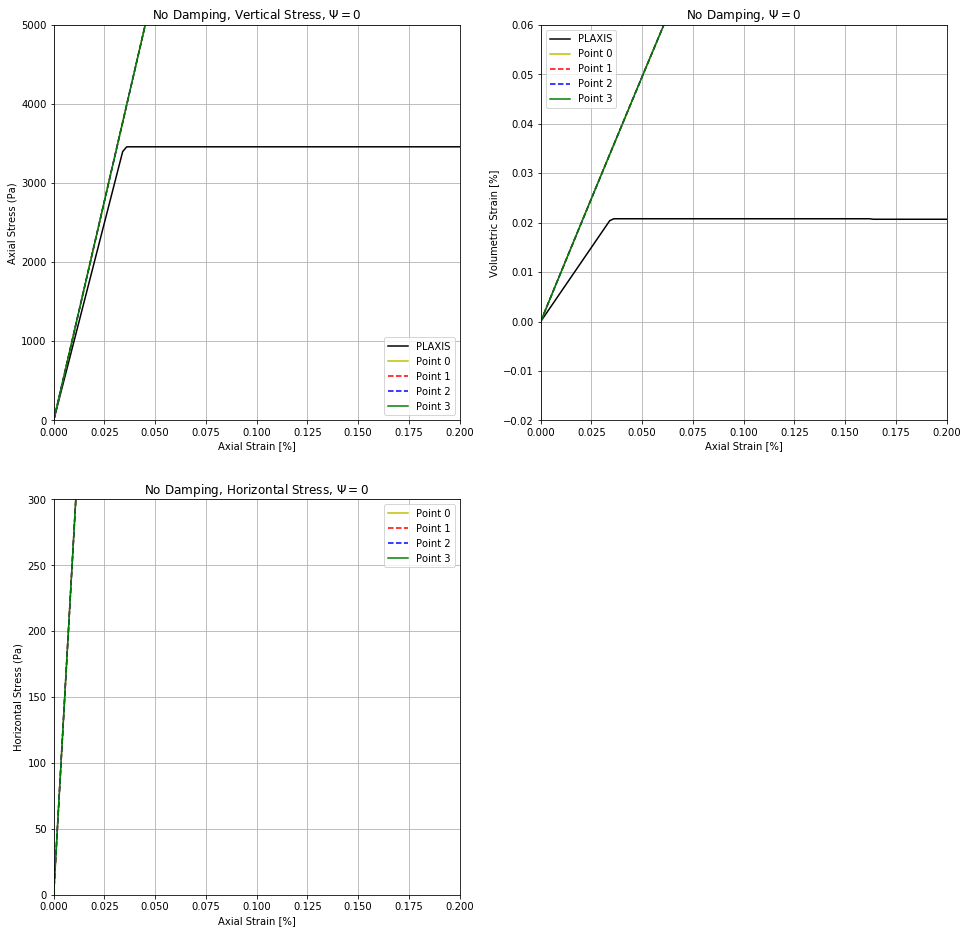

In [9]:
# Plot Comparison for Psi = 0, No Damping
plt.figure(figsize=(16,16))

plt.subplot(221)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,1] * 1000, 'k', label='PLAXIS')
plt.plot(strain_nodamping_f_0[:,2] * -100 , stress_nodamping_f_0[:,2] * -1, 'y', label='Point 0')
plt.plot(strain_nodamping_f_1[:,2] * -100 , stress_nodamping_f_1[:,2] * -1, 'r--', label='Point 1')
plt.plot(strain_nodamping_f_2[:,2] * -100 , stress_nodamping_f_2[:,2] * -1, 'b--', label='Point 2')
plt.plot(strain_nodamping_f_3[:,2] * -100 , stress_nodamping_f_3[:,2] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 5000])
plt.legend(loc='lower right')
plt.title('No Damping, Vertical Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Axial Stress (Pa)')
plt.grid(True)

plt.subplot(222)
plt.plot(plaxis_psi0[:,0] * -100, plaxis_psi0[:,2] * -100, 'k', label='PLAXIS')
plt.plot(strain_nodamping_f_0[:,2] * -100 , (strain_nodamping_f_0[:,2] + strain_nodamping_f_0[:,1]) * -100, 'y', label='Point 0')
plt.plot(strain_nodamping_f_1[:,2] * -100 , (strain_nodamping_f_1[:,2] + strain_nodamping_f_1[:,1]) * -100, 'r--', label='Point 1')
plt.plot(strain_nodamping_f_2[:,2] * -100 , (strain_nodamping_f_2[:,2] + strain_nodamping_f_2[:,1]) * -100, 'b--', label='Point 2')
plt.plot(strain_nodamping_f_3[:,2] * -100 , (strain_nodamping_f_3[:,2] + strain_nodamping_f_3[:,1]) * -100, 'g', label='Point 3')
plt.axis([0, 0.2, -0.02, 0.06])
plt.legend(loc='upper left')
plt.title('No Damping, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Volumetric Strain [%]')
plt.grid(True)    

plt.subplot(223)
plt.plot(strain_nodamping_f_0[:,2] * -100 , stress_nodamping_f_0[:,1] * -1, 'y', label='Point 0')
plt.plot(strain_nodamping_f_1[:,2] * -100 , stress_nodamping_f_1[:,1] * -1, 'r--', label='Point 1')
plt.plot(strain_nodamping_f_2[:,2] * -100 , stress_nodamping_f_2[:,1] * -1, 'b--', label='Point 2')
plt.plot(strain_nodamping_f_3[:,2] * -100 , stress_nodamping_f_3[:,1] * -1, 'g', label='Point 3')
plt.axis([0, 0.2, 0, 300])
plt.legend(loc='upper right')
plt.title('No Damping, Horizontal Stress, $\Psi = 0$')
plt.xlabel('Axial Strain [%]')
plt.ylabel('Horizontal Stress (Pa)')
plt.grid(True)

plt.show()

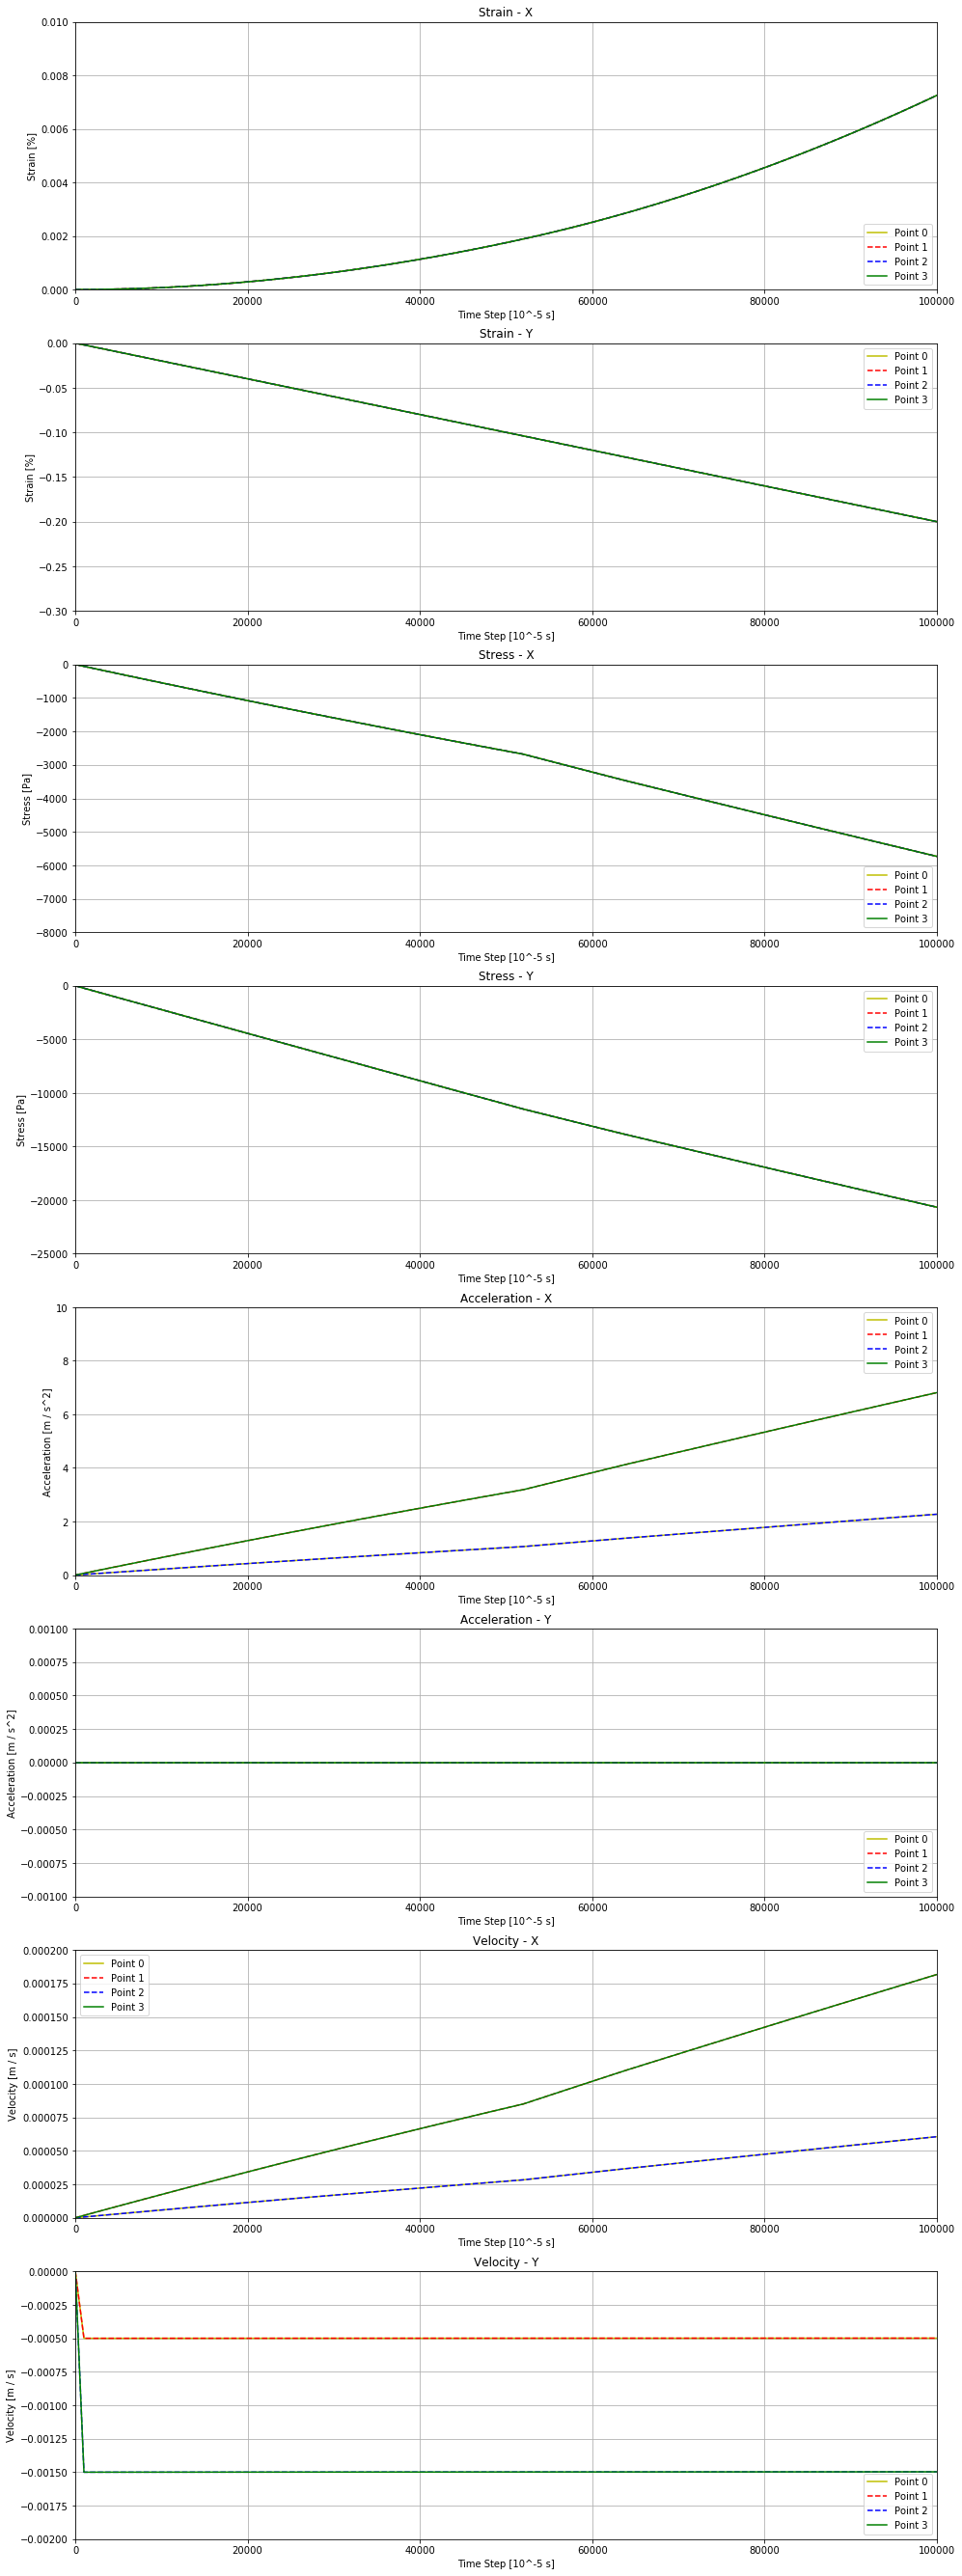

In [10]:
# Plot Comparison

plt.figure(figsize=(16,48))

plt.subplot(811)
plt.plot(strain_nodamping_f_0[:,0], strain_nodamping_f_0[:,1] * 100, 'y', label='Point 0')
plt.plot(strain_nodamping_f_1[:,0], strain_nodamping_f_1[:,1] * 100, 'r--', label='Point 1')
plt.plot(strain_nodamping_f_2[:,0], strain_nodamping_f_2[:,1] * 100, 'b--', label='Point 2')
plt.plot(strain_nodamping_f_3[:,0], strain_nodamping_f_3[:,1] * 100, 'g', label='Point 3')
plt.axis([0, 100000, 0, 0.01])
plt.legend(loc='lower right')
plt.title('Strain - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Strain [%]')
plt.grid(True)

plt.subplot(812)
plt.plot(strain_nodamping_f_0[:,0], strain_nodamping_f_0[:,2] * 100, 'y', label='Point 0')
plt.plot(strain_nodamping_f_1[:,0], strain_nodamping_f_1[:,2] * 100, 'r--', label='Point 1')
plt.plot(strain_nodamping_f_2[:,0], strain_nodamping_f_2[:,2] * 100, 'b--', label='Point 2')
plt.plot(strain_nodamping_f_3[:,0], strain_nodamping_f_3[:,2] * 100, 'g', label='Point 3')
plt.axis([0, 100000, -0.3, 0 ])
plt.legend(loc='upper right')
plt.title('Strain - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Strain [%]')
plt.grid(True)

plt.subplot(813)
plt.plot(stress_nodamping_f_0[:,0], stress_nodamping_f_0[:,1], 'y', label='Point 0')
plt.plot(stress_nodamping_f_1[:,0], stress_nodamping_f_1[:,1], 'r--', label='Point 1')
plt.plot(stress_nodamping_f_2[:,0], stress_nodamping_f_2[:,1], 'b--', label='Point 2')
plt.plot(stress_nodamping_f_3[:,0], stress_nodamping_f_3[:,1], 'g', label='Point 3')
plt.axis([0, 100000, -8000, 0])
plt.legend(loc='lower right')
plt.title('Stress - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Stress [Pa]')
plt.grid(True)

plt.subplot(814)
plt.plot(stress_nodamping_f_0[:,0], stress_nodamping_f_0[:,2], 'y', label='Point 0')
plt.plot(stress_nodamping_f_1[:,0], stress_nodamping_f_1[:,2], 'r--', label='Point 1')
plt.plot(stress_nodamping_f_2[:,0], stress_nodamping_f_2[:,2], 'b--', label='Point 2')
plt.plot(stress_nodamping_f_3[:,0], stress_nodamping_f_3[:,2], 'g', label='Point 3')
plt.axis([0, 100000, -25000, 0])
plt.legend(loc='upper right')
plt.title('Stress - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Stress [Pa]')
plt.grid(True)

plt.subplot(815)
plt.plot(acceleration_nodamping_f_0[:,0], acceleration_nodamping_f_0[:,1], 'y', label='Point 0')
plt.plot(acceleration_nodamping_f_1[:,0], acceleration_nodamping_f_1[:,1], 'r--', label='Point 1')
plt.plot(acceleration_nodamping_f_2[:,0], acceleration_nodamping_f_2[:,1], 'b--', label='Point 2')
plt.plot(acceleration_nodamping_f_3[:,0], acceleration_nodamping_f_3[:,1], 'g', label='Point 3')
plt.axis([0, 100000, 0, 10])
plt.legend(loc='upper right')
plt.title('Acceleration - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Acceleration [m / s^2]')
plt.grid(True)

plt.subplot(816)
plt.plot(acceleration_nodamping_f_0[:,0], acceleration_nodamping_f_0[:,2], 'y', label='Point 0')
plt.plot(acceleration_nodamping_f_1[:,0], acceleration_nodamping_f_1[:,2], 'r--', label='Point 1')
plt.plot(acceleration_nodamping_f_2[:,0], acceleration_nodamping_f_2[:,2], 'b--', label='Point 2')
plt.plot(acceleration_nodamping_f_3[:,0], acceleration_nodamping_f_3[:,2], 'g', label='Point 3')
plt.axis([0, 100000, -0.001, 0.001])
plt.legend(loc='lower right')
plt.title('Acceleration - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Acceleration [m / s^2]')
plt.grid(True)

plt.subplot(817)
plt.plot(velocity_nodamping_f_0[:,0], velocity_nodamping_f_0[:,1], 'y', label='Point 0')
plt.plot(velocity_nodamping_f_1[:,0], velocity_nodamping_f_1[:,1], 'r--', label='Point 1')
plt.plot(velocity_nodamping_f_2[:,0], velocity_nodamping_f_2[:,1], 'b--', label='Point 2')
plt.plot(velocity_nodamping_f_3[:,0], velocity_nodamping_f_3[:,1], 'g', label='Point 3')
plt.axis([0, 100000, 0, 0.0002])
plt.legend(loc='upper left')
plt.title('Velocity - X')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Velocity [m / s]')
plt.grid(True)

plt.subplot(818)
plt.plot(velocity_nodamping_f_0[:,0], velocity_nodamping_f_0[:,2], 'y', label='Point 0')
plt.plot(velocity_nodamping_f_1[:,0], velocity_nodamping_f_1[:,2], 'r--', label='Point 1')
plt.plot(velocity_nodamping_f_2[:,0], velocity_nodamping_f_2[:,2], 'b--', label='Point 2')
plt.plot(velocity_nodamping_f_3[:,0], velocity_nodamping_f_3[:,2], 'g', label='Point 3')
plt.axis([0, 100000, -0.002, 0])
plt.legend(loc='lower right')
plt.title('Velocity - Y')
plt.xlabel('Time Step [10^-5 s]')
plt.ylabel('Velocity [m / s]')
plt.grid(True)

plt.show()